In [1]:
# Dependencies
import time
import json
import requests
from scipy.stats import linregress
from matplotlib import pyplot as plt
from scipy.stats import stats
from sklearn import datasets
import pandas as pd
import numpy as np
from csv import writer
from csv import reader

%matplotlib inline

In [18]:
# read from Daniel Jackson's csv
csv = pd.read_csv("../Daniel Jackson's Work/Stock_outputs.csv")
df = pd.DataFrame(csv)
df.head()

# formatting
df = df.replace(np.nan,0)
df=df[df['Quarter']!=0]
df = df.sort_values('Quarter', ascending=True)
df = df.reset_index()
df.drop(df[df['Symbol'] == "OPTT"].index, inplace = True)
df

,index,Unnamed: 0,Symbol,Name,Exchange,Quarter,Revenue($mm),EBIT($mm),Debt($mm),Dividend Payout($mm),Operating Margin (%),Leverage (Debt/EBIT),Payout (% of EBIT)
0,419,41,VSLR,Vivint Solar,NASDAQ,2017-12-31,66.78,-26.03,928.43,-13.52,-38.98,-8.92,-51.94
1,384,6,DVN,Devon Energy,S&P500,2017-12-31,3983.00,-428.00,10291.00,215.00,-10.75,-6.01,50.23
2,385,7,EOG,EOG Resources,S&P500,2017-12-31,648.60,476.68,6030.84,-97.27,73.49,3.16,20.41
3,386,8,FANG,Diamondback Energy,S&P500,2017-12-31,399.19,116.54,1477.35,-13.73,29.19,3.17,11.78
4,390,12,HFC,Hollyfrontier Corp,S&P500,2017-12-31,3992.70,452.60,2498.99,58.99,11.34,1.38,-13.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,22,22,SLB,Schlumberger N.V.,S&P500,2020-06-30,5356.00,-2879.00,16763.00,-694.00,-53.75,-1.46,-24.11
413,23,23,VLO,Valero Energy Corp,S&P500,2020-06-30,10397.00,1828.00,0.00,0.00,17.58,0.00,0.00
414,25,25,XOM,Exxon Mobil Corp,S&P500,2020-06-30,32605.00,-1640.00,0.00,0.00,-5.03,0.00,0.00
415,9,9,FTI,Technipfmc Plc,S&P500,2020-06-30,3158.50,214.00,3982.90,0.00,6.78,4.65,0.00


In [19]:
df["Quarter"].dtypes

dtype('O')

In [20]:
# groupby max values
quarter_div = df[['Quarter', 'Dividend Payout($mm)']].groupby('Quarter').mean()['Dividend Payout($mm)']
quarter_op = df[['Quarter', 'Operating Margin (%)']].groupby('Quarter').mean()['Operating Margin (%)']
quarter_lev = df[['Quarter', 'Leverage (Debt/EBIT)']].groupby('Quarter').mean()['Leverage (Debt/EBIT)']
quarter_ebit = df[['Quarter', 'Payout (% of EBIT)']].groupby('Quarter').mean()['Payout (% of EBIT)']


quarterly_dict = {
    'Average Quarterly Dividend Payout': quarter_div,
    'Average Quarterly Operating Margin (%)': quarter_op,
    'Average Quarterly Leverage Ratio': quarter_lev,
    'Average Quarterly EBIT': quarter_ebit
}
quarterly_data = pd.DataFrame(quarterly_dict)
quarterly_data=quarterly_data.reset_index()
quarterly_data

,Quarter,Average Quarterly Dividend Payout,Average Quarterly Operating Margin (%),Average Quarterly Leverage Ratio,Average Quarterly EBIT
0,2017-12-31,-135.391200,268.386000,0.241600,5.052800
1,2018-03-31,-250.124000,14.711500,-0.405250,19.631250
2,2018-06-30,-260.675500,9.575750,4.575250,24.653750
3,2018-09-30,-263.287250,14.382750,5.284250,0.981000
4,2018-12-30,-16.500000,-32.900000,-1.430000,-10.980000
5,2018-12-31,-168.664500,16.844250,inf,22.463500
6,2019-03-31,-266.837073,20.005366,-1.200976,16.850488
7,2019-06-30,-279.118537,20.819268,1.116098,18.623902
8,2019-09-30,-275.454634,25.396585,0.938049,12.144146
9,2019-12-31,-296.931707,14.501951,113.776585,16.104634


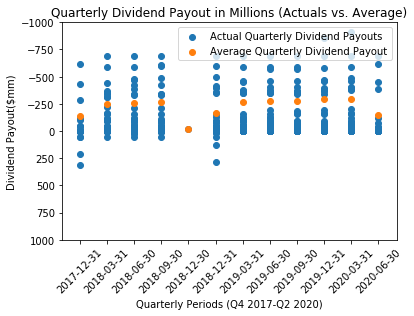

In [21]:
# dividend payout per quarter visualization

x_values = df['Quarter']
y_values = df['Dividend Payout($mm)']
plt.scatter(x_values, y_values, label="Actual Quarterly Dividend Payouts")

# average dividend payout over visualization
x_values = quarterly_data['Quarter']
y_values = quarterly_data['Average Quarterly Dividend Payout']
plt.scatter(x_values, y_values, label="Average Quarterly Dividend Payout")

# formatting
plt.xlabel("Quarterly Periods (Q4 2017-Q2 2020)")
plt.ylabel("Dividend Payout($mm)")
plt.title("Quarterly Dividend Payout in Millions (Actuals vs. Average)")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.ylim(1000,-1000)

# save output
plt.savefig("../visualizations/dividend_payout_per_quarter.png")

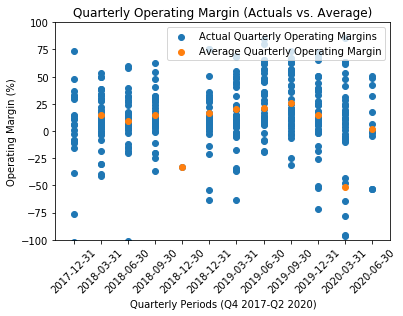

In [22]:
# operating margin per quarter visualization
x_values_1 = df['Quarter']
y_values_1 = df['Operating Margin (%)']
plt.scatter(x_values_1, y_values_1, label="Actual Quarterly Operating Margins")

# average operating margin per quarter visualization
x_values = quarterly_data['Quarter']
y_values = quarterly_data['Average Quarterly Operating Margin (%)']
plt.scatter(x_values, y_values, label="Average Quarterly Operating Margin")

# formatting
plt.xlabel("Quarterly Periods (Q4 2017-Q2 2020)")
plt.ylabel("Operating Margin (%)")
plt.title("Quarterly Operating Margin (Actuals vs. Average)")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.ylim(-100,100)

# save output
plt.savefig("../visualizations/operating_margin_per_quarter.png")

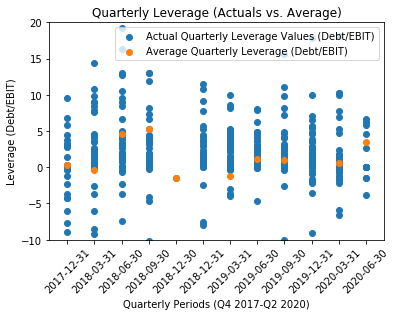

In [25]:
# leverage per quarter visualization
x_values = df['Quarter']
y_values = df['Leverage (Debt/EBIT)']
plt.scatter(x_values, y_values, label="Actual Quarterly Leverage Values (Debt/EBIT)")

# average leverage per quarter visualization
x_values = quarterly_data['Quarter']
y_values = quarterly_data['Average Quarterly Leverage Ratio']
plt.scatter(x_values, y_values, label="Average Quarterly Leverage (Debt/EBIT)")

# formatting
plt.xlabel("Quarterly Periods (Q4 2017-Q2 2020)")
plt.ylabel("Leverage (Debt/EBIT)")
plt.title("Quarterly Leverage (Actuals vs. Average)")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.ylim(-10,20)

# save output
plt.savefig("../visualizations/leverage_per_quarter.png")

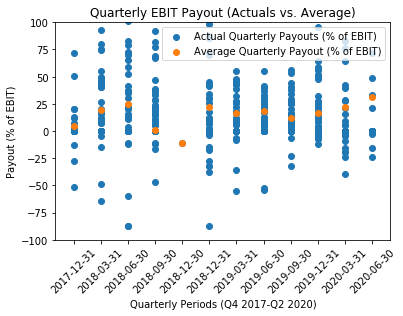

In [26]:
# EBIT payout per quarter visualization
x_values = df['Quarter']
y_values = df['Payout (% of EBIT)']
plt.scatter(x_values, y_values, label="Actual Quarterly Payouts (% of EBIT)")

# average EBIT payout per quarter visualization
x_values = quarterly_data['Quarter']
y_values = quarterly_data['Average Quarterly EBIT']
plt.scatter(x_values, y_values, label="Average Quarterly Payout (% of EBIT)")

# formatting
plt.xlabel("Quarterly Periods (Q4 2017-Q2 2020)")
plt.ylabel("Payout (% of EBIT)")
plt.title("Quarterly EBIT Payout (Actuals vs. Average)")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.ylim(-100,100)

# save output
plt.savefig("../visualizations/EBIT_payout_per_quarter.png")

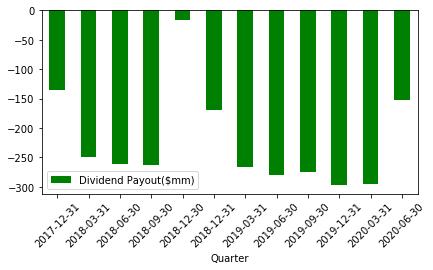

In [11]:
# average dividend payout over time visualization
average_quarterly_dividend_payout=pd.DataFrame(quarterly_dict['Average Quarterly Dividend Payout'])
average_quarterly_dividend_payout.plot(kind='bar',color='g')
plt.tight_layout()

plt.xticks(rotation=45)

# save output
plt.savefig("../visualizations/average_dividend_payout_over_time")

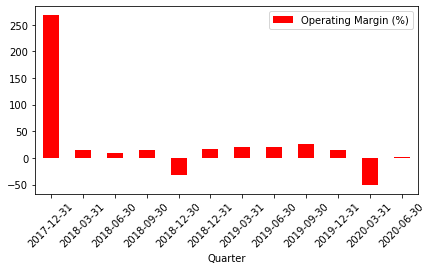

In [12]:
# average operating margin over time visualization
average_quarterly_operating_margin=pd.DataFrame(quarterly_dict['Average Quarterly Operating Margin (%)'])
average_quarterly_operating_margin.plot(kind='bar',color='r')
plt.tight_layout()

plt.xticks(rotation=45)

# save output
plt.savefig("../visualizations/average_operating_margin_over_time")

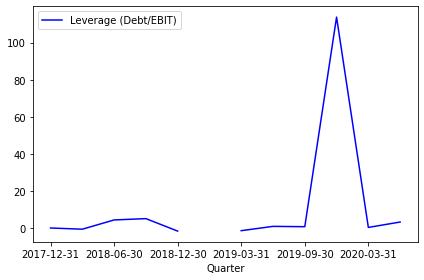

In [13]:
# average leverage over time visualization
average_quarterly_leverage=pd.DataFrame(quarterly_dict['Average Quarterly Leverage Ratio'])
average_quarterly_leverage.plot(kind='line',color='b')
plt.tight_layout()

# save output
plt.savefig("../visualizations/average_leverage_over_time")

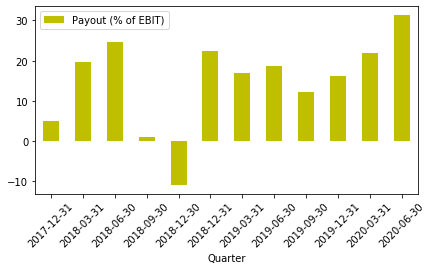

In [14]:
# average EBIT over time visualization
average_quarterly_ebit=pd.DataFrame(quarterly_dict['Average Quarterly EBIT'])
average_quarterly_ebit.plot(kind='bar',color='y')
plt.tight_layout()

plt.xticks(rotation=45)

# save output
plt.savefig("../visualizations/average_EBIT_over_time")

In [ ]:
# div = df["Dividend Payout($mm)"]
# new_div = div.dropna()

# variance = np.var(new_div)
# print(f"The variance using the NumPy module is {variance}")

# sd_numpy = np.std(new_div,ddof = 0)
# print(f"The standard deviation using the NumPy module is {sd_numpy}")

# mean_numpy = np.mean(new_div)

# print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
# print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
# print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")